<a href="https://colab.research.google.com/github/SanthoshD123/classify_clothes/blob/main/classify_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_data=tf.keras.datasets.fashion_mnist

In [ ]:
(inp_train,out_train),(inp_test,out_test)=fashion_data.load_data()
inp_train = inp_train/255.0
inp_test = inp_test/255.0
print("Shape of Input Training Data: ", inp_train.shape)
print("Shape of Output Training Data: ", out_train.shape)
print("Shape of Input Testing Data: ", inp_test.shape)
print("Shape of Output Testing Data: ", out_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
Shape of Input Training Data:  (60000, 28, 28)
Shape of Output Training Data:  (60000,)
Shape of Input Testing Data:  (10000, 28, 28)
Shape of Output Testing Data:  (10000,)


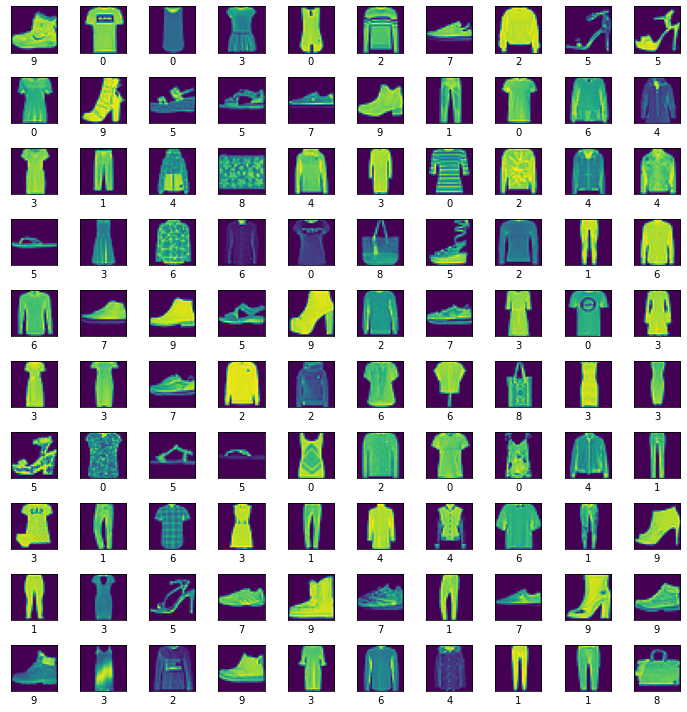

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(inp_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(out_train[i])
    plt.tight_layout()
plt.show()

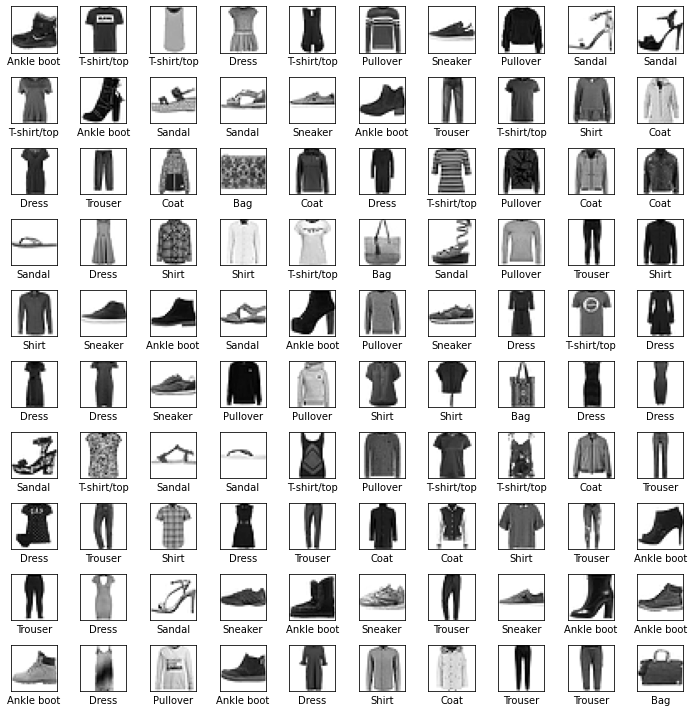

In [ ]:
Labels=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(inp_train[i], cmap=plt.cm.binary)
    plt.xlabel(Labels[out_train[i]])
    plt.tight_layout()
plt.show()

In [ ]:
my_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
my_model.fit(inp_train, out_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5015 - accuracy: 0.8244
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8651
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.8854
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.8911
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8962
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.9015
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2571 - accuracy: 0.9044
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2487 - accuracy: 0.9078
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [ ]:
loss, accuracy = my_model.evaluate(inp_test,out_test,verbose=2)
print('\nAccuracy:',accuracy*100)

313/313 - 1s - loss: 0.3450 - accuracy: 0.8897 - 611ms/epoch - 2ms/step

Accuracy: 88.96999955177307


In [ ]:
prob=tf.keras.Sequential([my_model,tf.keras.layers.Softmax()])
pred=prob.predict(inp_test)

313/313 [==============================] - 0s 1ms/step


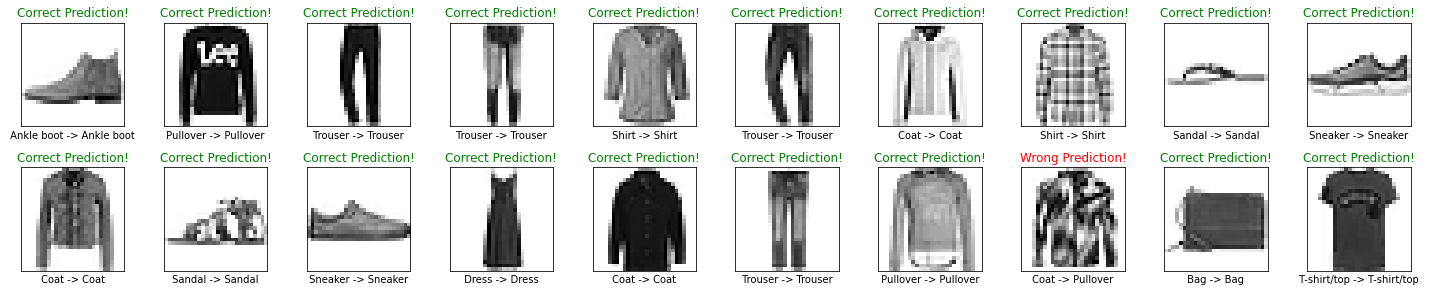

In [ ]:
plt.figure(figsize=(20,20))
for i in range(20):
    true_label,image = out_test[i],inp_test[i]
    pred_label = np.argmax(pred[i])
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    if pred_label == true_label:
        color = 'green'
        label="Correct Prediction!"
    else:
        color = 'red'
        label="Wrong Prediction!"
    plt.tight_layout()
    plt.title(label,color=color)
    plt.xlabel(" {} -> {} ".format(Labels[true_label],Labels[pred_label]))
